# K-평균

이전 챕터에서는 어떤 과일이 있는지 미리 알았기 때문에 과일별 평균을 구할수 있었다.

하지만 진짜 비지도 학습에서는 사진에 어떤 과일이 있는지 알수 없다.

이런경우에 K-평균 군집 알고리즘으로 평균을 알 수 있다.

### K-평균 알고리즘 소개

k-평균 알고리즘의 작동 방식
- 일단 무작위로 k개의 클러스터 중심을 정한다. 이때 클러스터 중심이란 각 데이터의 평균값이다. 변수의 차원은 상관없다.
- 각 샘플은 가장 가까운 클러스터의 샘플로 지정된다.
- 새로운 클러스터의 중심은 그 클러스트에 속한 샘플들의 중심으로 정해진다.
- 클러스터 중심이 변하지 않을때 까지 2~3번 작업을 반복한다.

그룹간의 분산이 크고, 그룹 내에서 분산이 크지 않은 데이터에서 유용하다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
fruits = np.load('data.npy')

fruits_2d = fruits.reshape(300, -1)
fruits_2d.shape

(300, 10000)

### K-평균 알고리즘 모델

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=20)
km.fit(fruits_2d)

c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=20)

- 군집된 결과는 `labels_` 속성에 저장된다. 배열의 길이는 샘플 개수와 같다.
- `n_clusters` = 3 으로 지정됐기 때문에, labels_는 0, 1, 2의 값중 하나이다.

In [5]:
print(km.labels_)

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


- 초기 클러스터의 중심을 랜덤으로 지정하기 떄문에, `0, 1, 2` 값에는 어떤 의미도 없이 랜덤으로 정해진다.

In [6]:
# 레이블별로 개수 출력
df = pd.DataFrame(km.labels_)
df.value_counts()

2    111
0     98
1     91
Name: count, dtype: int64

- 각 라벨별로 시각화

In [7]:
label_0, label_1, label_2 = [fruits[km.labels_ == i]for i in range(3)]

In [8]:
print(np.ceil(n/10) * 10)


NameError: name 'n' is not defined

In [ ]:
def vis(data):
    n = len(data)

    rows = int(np.ceil(n/10))
    columns = 10
    fig, axs = plt.subplots(rows, columns, figsize= (10, 10))

    for i in range(rows):
        for j in range(columns):
            idx = i * 10 + j
            axs[i, j].axis('off')
            if idx >= n :
                continue
            axs[i, j].imshow(data[idx], cmap='gray_r')

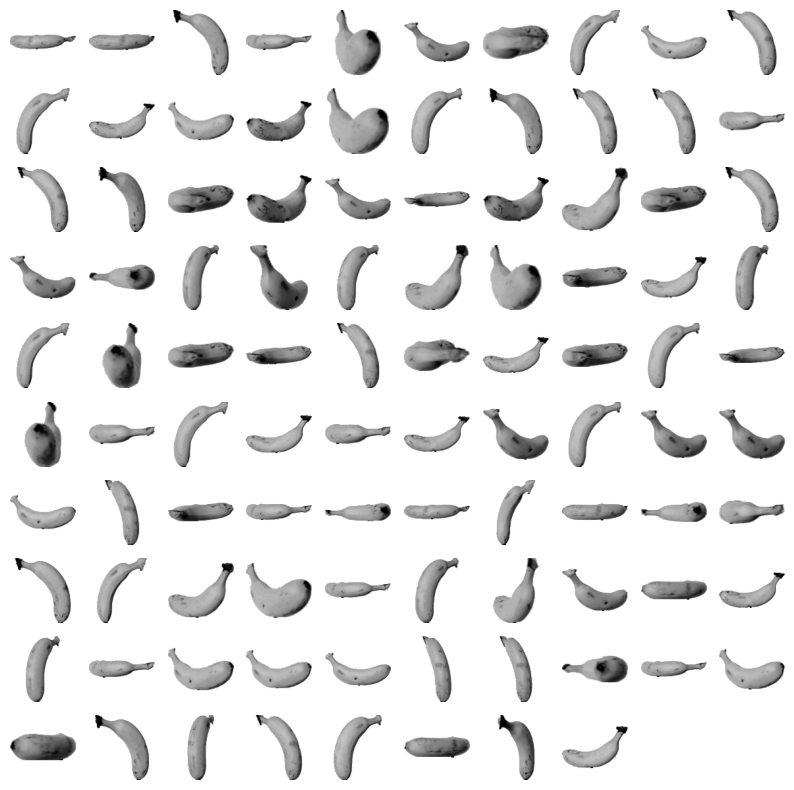

In [ ]:
vis(label_0)

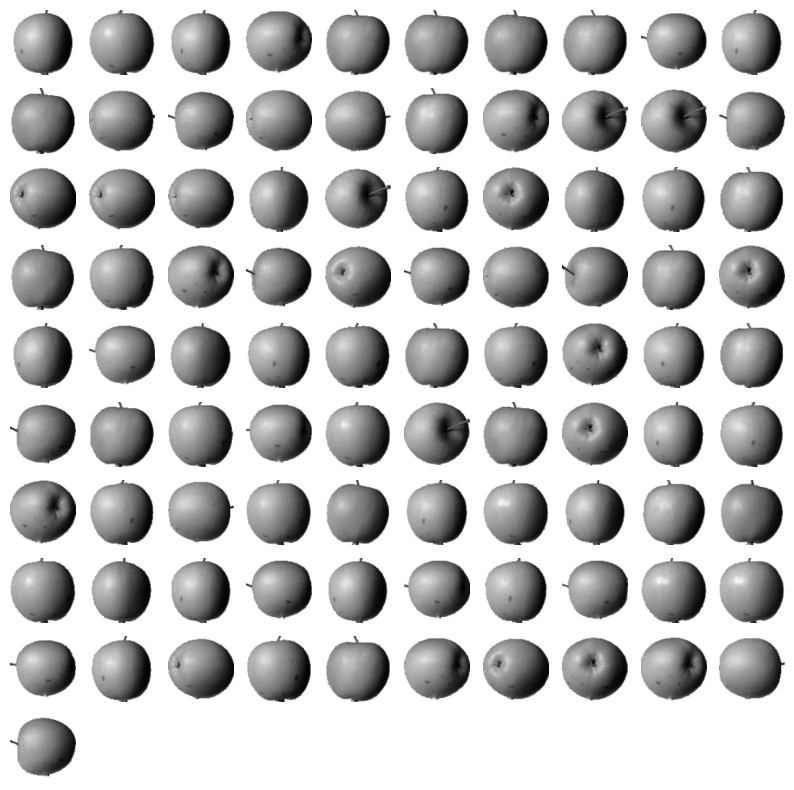

In [ ]:
vis(label_1)

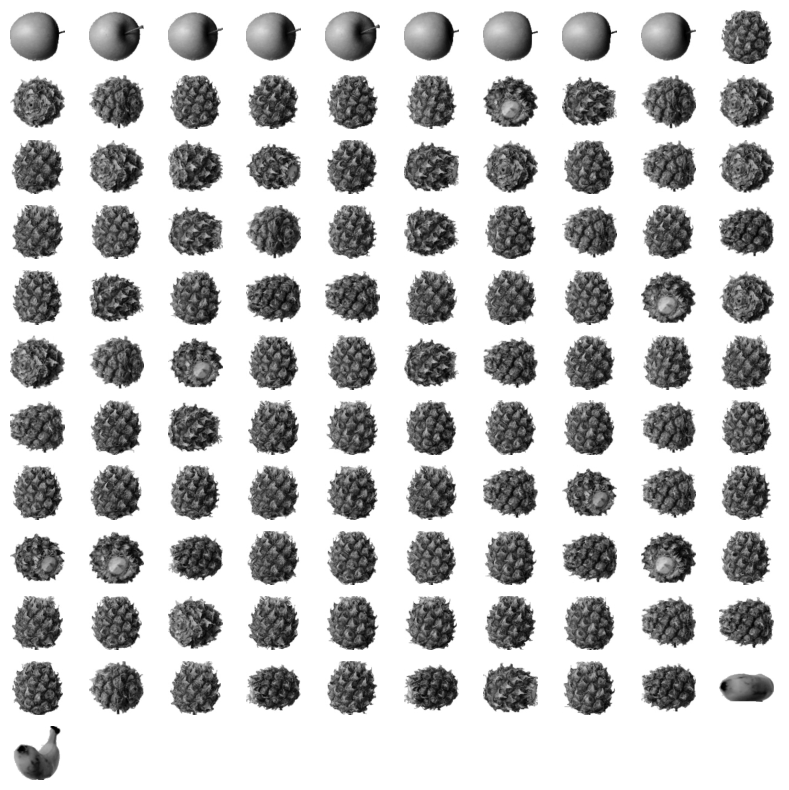

In [ ]:
vis(label_2)

### 클러스터 중심

클러스터 중심은 `cluster_centers_` 속성에 저장되어있다.

(3, 10000)
(3, 100, 100)


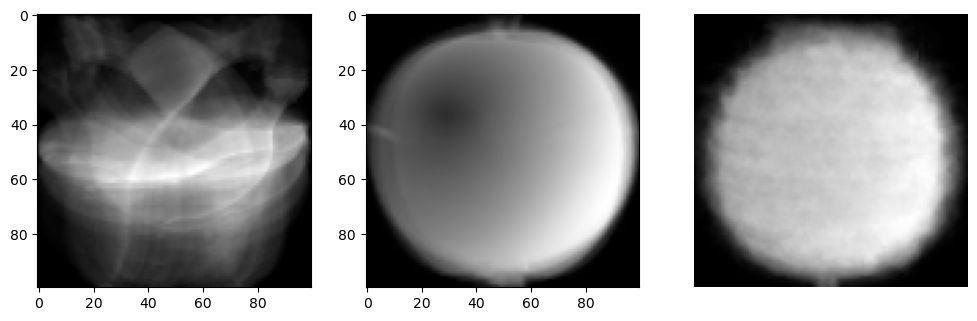

In [ ]:
print(km.cluster_centers_.shape)
clusters = km.cluster_centers_.reshape(3, 100, -1)
print(clusters.shape)

fig, axs = plt.subplots(1, 3, figsize = (12, 4))

for i in range(3):
    axs[i].imshow(clusters[i], cmap='gray')

    plt.axis('off')

### 최적의 K 찾기

k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다. 이 거리의 제곱의 합을 이너셔(inertia)라고 부른다.

클러스터 개수가 증가할 수록 이너셔도 줄어든다.

최적의 군집 개수를 넘어서면, 이너셔가 줄어드는 속도가 줄어든다. 이것을 통해서 최적의 군집 개수를 찾을 수 있다.

In [12]:

inertia_list = []

for k in range(2, 10):
    km = KMeans(random_state=40, n_clusters=k)
    km.fit(fruits_2d)
    inertia_list.append(km.inertia_)



c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'inertia')

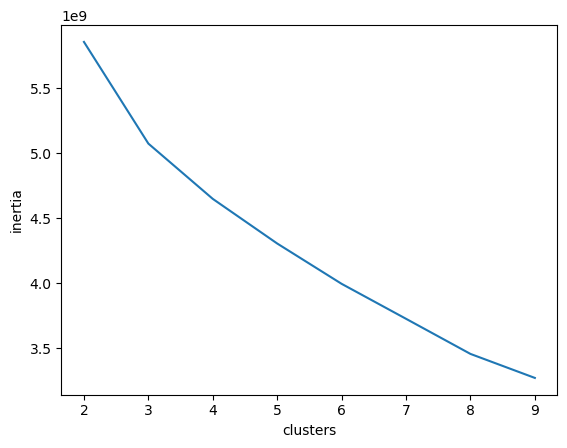

In [27]:
plt.plot(range(2, 10), inertia_list)
plt.xlabel('clusters')
plt.ylabel('inertia')


- 그래프를 통해서 최적의 군집수를 3이라고 판단할 수 있다.